# Audio

## Task 1

Для начала познакомимся с этими записями. \
Установи библиотеку [librosa](https://librosa.org/). Это популярная библиотека для работы с аудио.
Визуализируй аудио сигнал файла `0_1_0_1_1_1_0_0.wav` с помощью функции [librosa.display.waveshow](https://librosa.org/doc/main/generated/librosa.display.waveshow.html)
График должен быть такой же, как показано ниже (по значениям):

![waveform](../misc/images/waveform.png)
>Для того, чтобы прослушать это аудио файл, можешь воспользоваться [IPython.display.Audio](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio)

In [1]:
# !pip install librosa

In [2]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [3]:
# воспроизведение аудио-файла
audio = '../datasets/waves_yesno 2/0_1_0_1_1_1_0_0.wav'
ipd.Audio(audio)

Загружаем файл. «y» будет массивом чисел, содержащим в себе сам аудиофайл в числовом виде, а «sr» — sample rate, то есть, частотой дискретизации аудио.

In [4]:
y, sr = librosa.load(audio)  # sr - sample_rate - количество сэмплов (значений амплитуды) в секунду

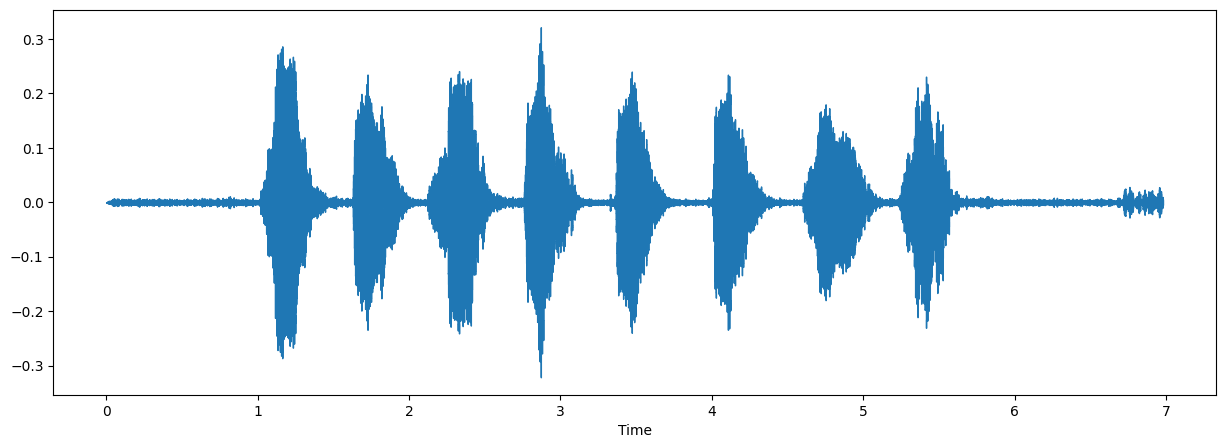

In [5]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()

## Task 2

Для классификации обычно использует не просто аудио сигнал, а его частотно-временное представление. Для этого сигнал требуется
преобразовать с помощью [оконного преобразования Фурье](https://clck.ru/34JnZD).
С помощью функции [librosa.display.specshow](https://librosa.org/doc/main/generated/librosa.display.specshow.html) 
выведи спектрограмму сигнала. \
График должен быть такой же, как показано ниже (по значениям):
![sftp](../misc/images/sftp.png)

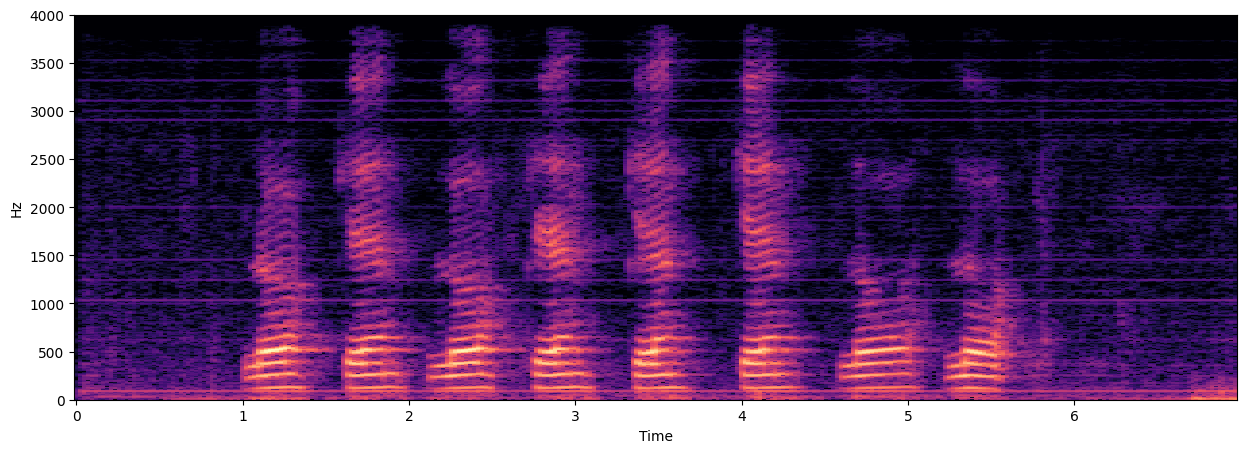

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
S = librosa.stft(y) # выполняем оконное преобразование Фурье для получения спектограммы S
S_db = librosa.amplitude_to_db(np.abs(S))  # преобразуем амплитуды спектограммы в децибелы
librosa.display.specshow(S_db, sr=sr, y_axis='linear', x_axis='time')
ax.set_ylim([0, 4000])
plt.show()

## Task 3

C помощью функции [load_dataset](code-samples/audio_utils.py) загрузи датасет. \
Раздели его на train и test c параметрами `test_size=0.2`, `random_state=42`. \
Выведи количество файлов в train и test частях.

In [7]:
from glob import glob
import os
from sklearn.model_selection import train_test_split

In [8]:
def load_dataset(directory: str):
    sr = None
    X, labels, files = [], [], []
    for f in glob(directory + "/*.wav"):  # цикл по файлам с расширением .wav в указанной директории
        filename = os.path.basename(f)  # извлекаем базовое имя файла из каждого файла в списке
        name = filename[:-4]  # имя файла без расширения
        y = [int(label) for label in name.split("_")]  # получаем метки из названия (0 или 1)
        x, sr = librosa.load(f)
        X.append(x)
        labels.append(y)
        files.append(filename)
# на выходе получаем 4 массива: 1. аудиосигналы, 2. метки, 3. частоты дискретизаций файлов, 4. названия файлов
    return X, labels, sr, files  

In [9]:
directory = '../datasets/waves_yesno 2/'
X, labels, sr, files = load_dataset(directory)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, 
                                                    test_size=0.2, 
                                                    random_state=42)
print(f'Количество файлов в train части: {len(X_train)}')
print(f'Количество файлов в test части: {len(X_test)}')

Количество файлов в train части: 47
Количество файлов в test части: 12


## Task 4

Наши аудио записи содержат как речь человека, так и молчание. Для каждой записи нам нужно определить сегменты записи, 
где человек молчит, а где произносит слова. \
Эта задача называется [Voice Activity Detection (VAD)](https://ru.wikipedia.org/wiki/Voice_Activity_Detection).
Придумайте или найдите метод, по которому можно распознавать участки с речью на аудио записи.

Например:
Запись '0_0_0_1_0_1_1_0.wav' содержит 137592 отсчетов. Сегменты с речью для этой записи (Отмечены красным):
[[23996, 32539],
 [35410, 44925],
 [49493, 57410],
 [60458, 68635],
 [73308, 81278],
 [84001, 91942],
 [97381, 104166],
 [109018, 115573]] 
![sftp](../misc/images/vad.png)

Выведи несколько примеров работы твоего VAD-алгоритма, по аналогии с примером, для других аудио записей. Попробуй добиться
наилучшего качества нахождения речи.

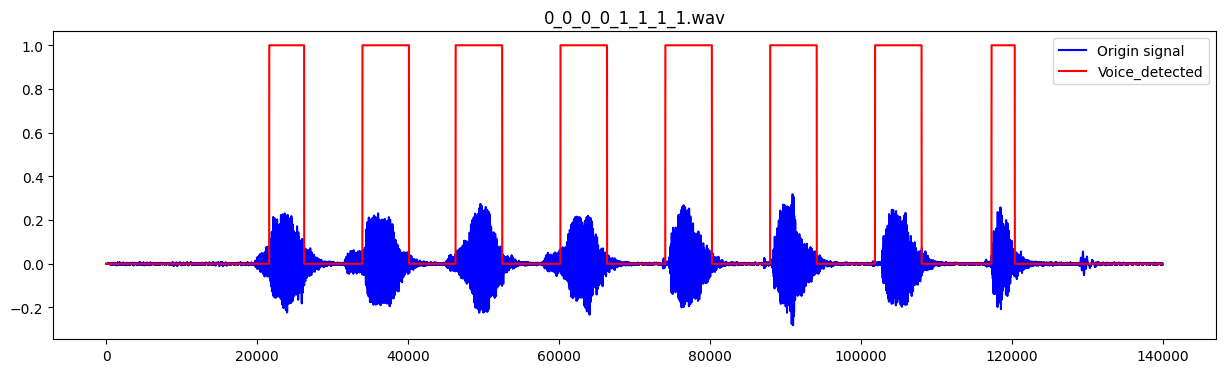

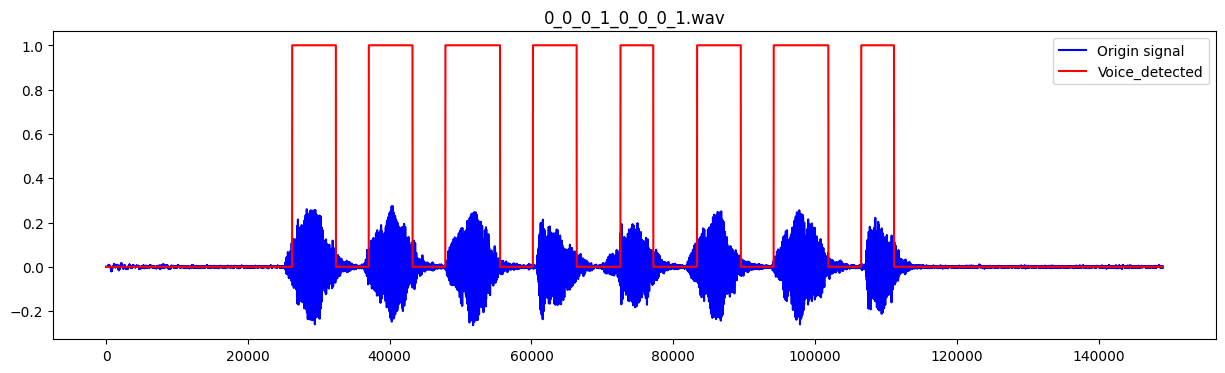

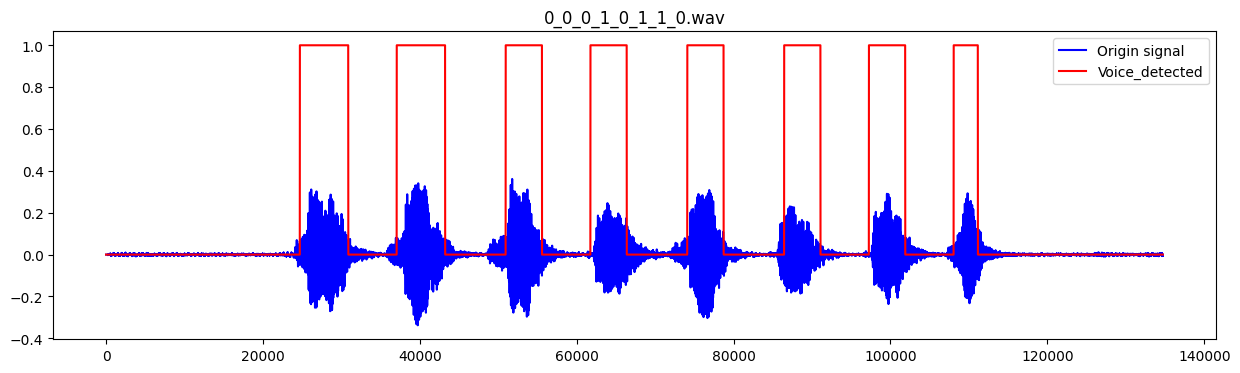

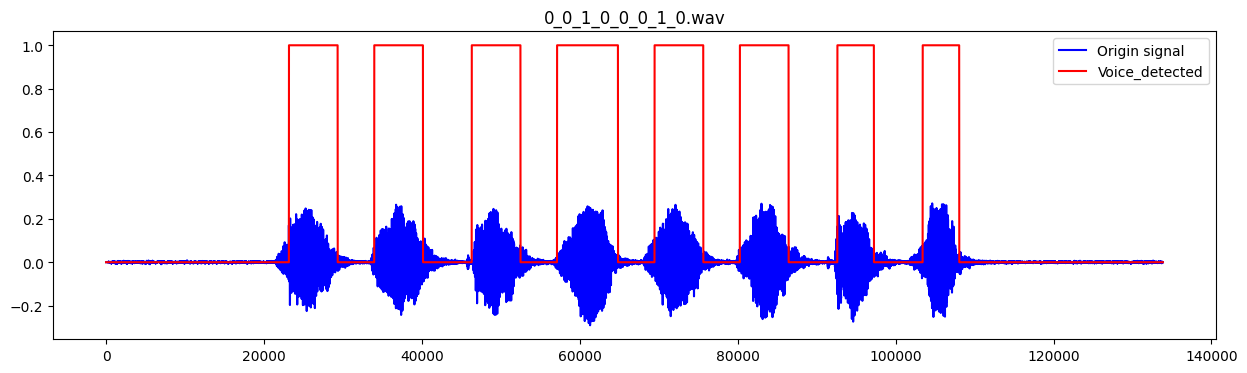

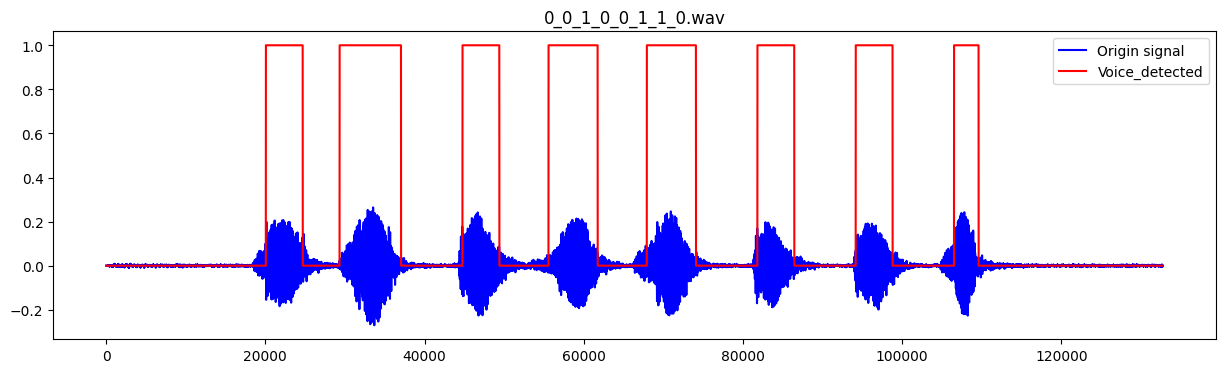

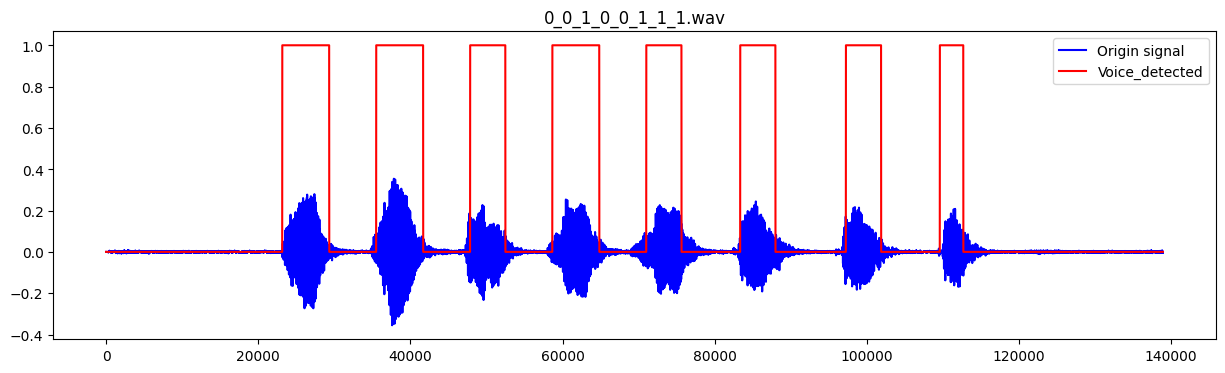

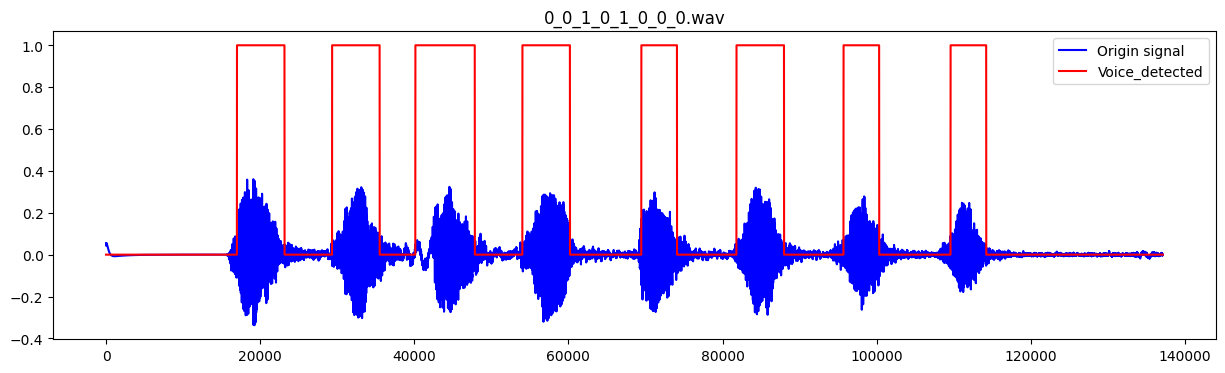

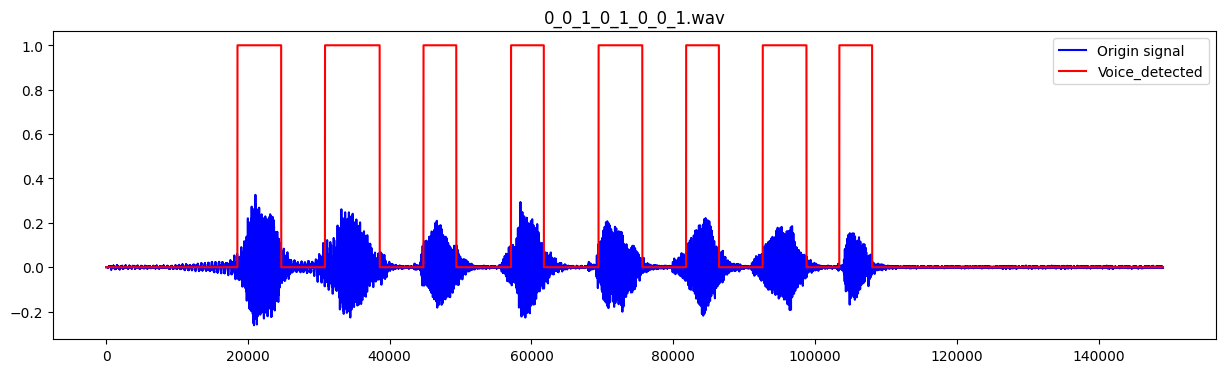

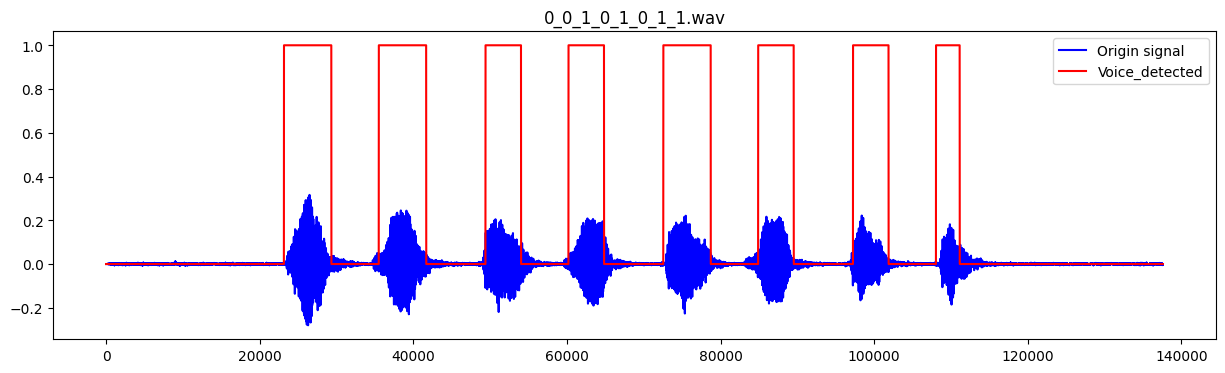

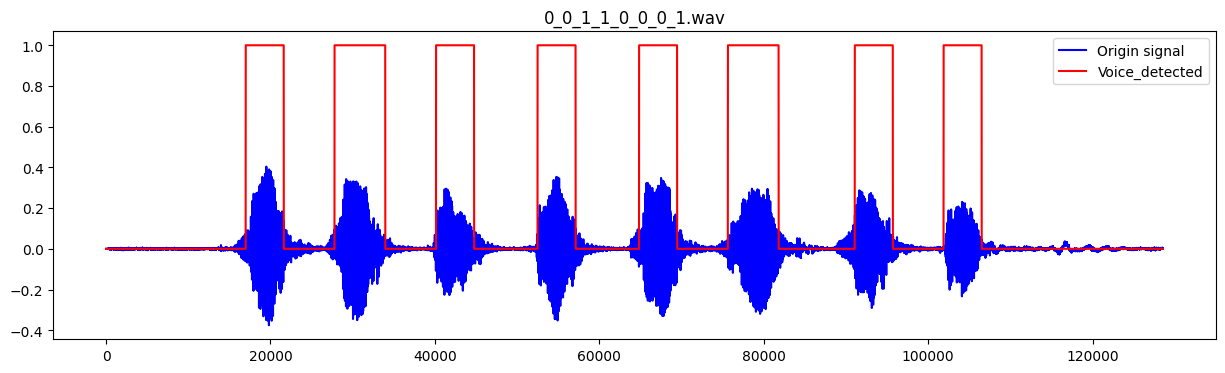

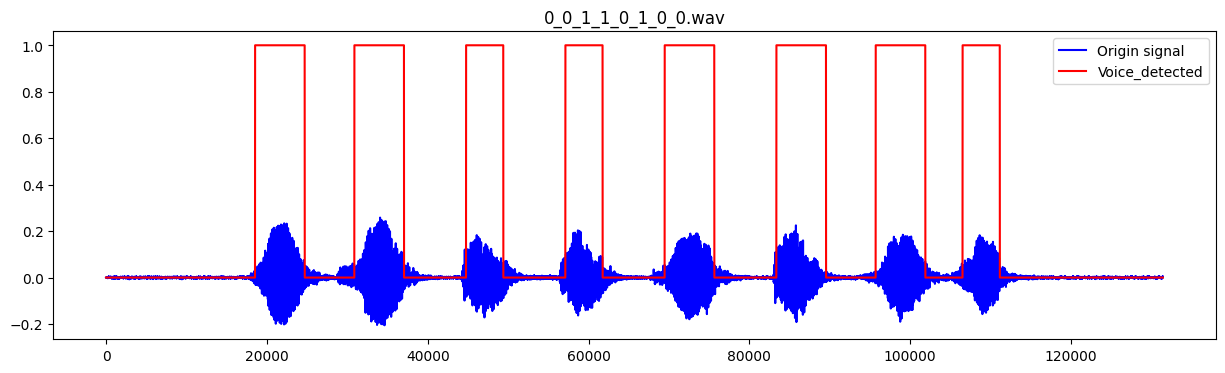

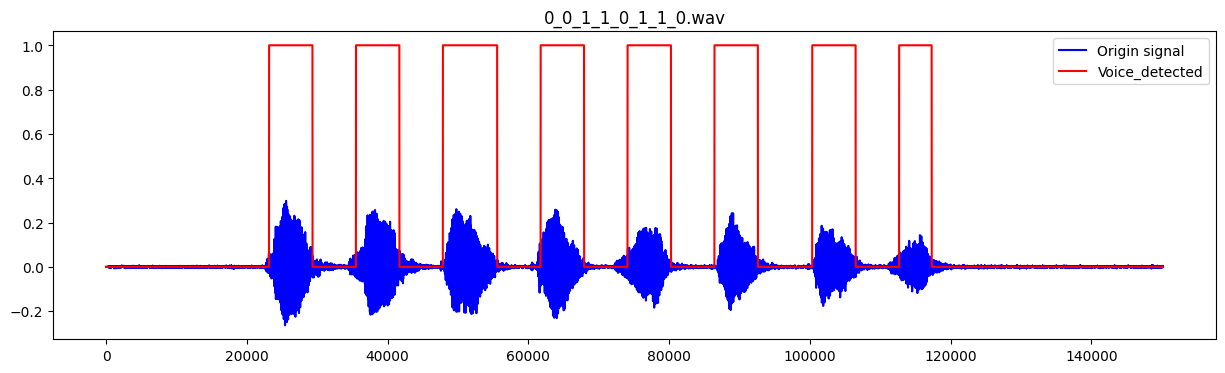

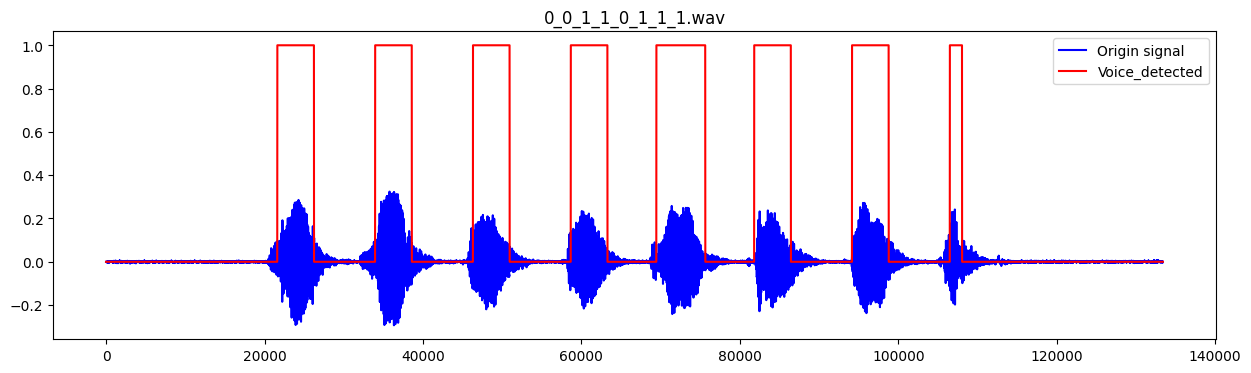

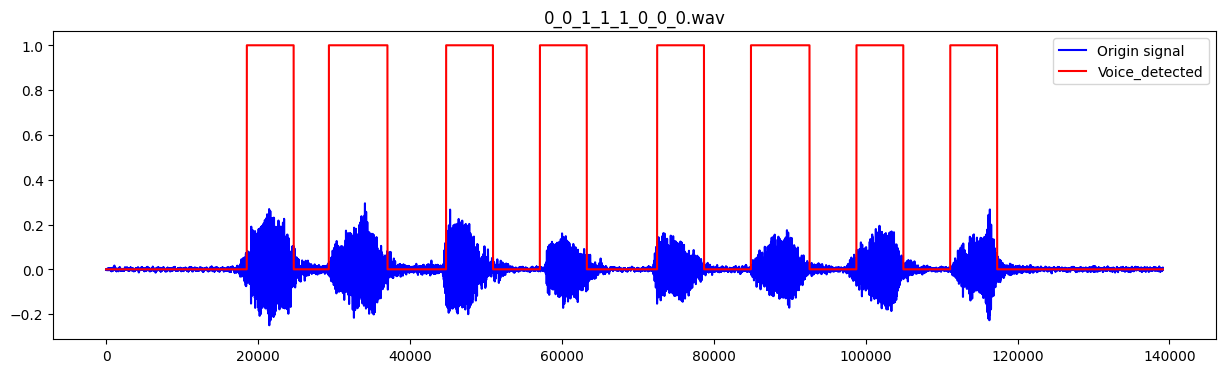

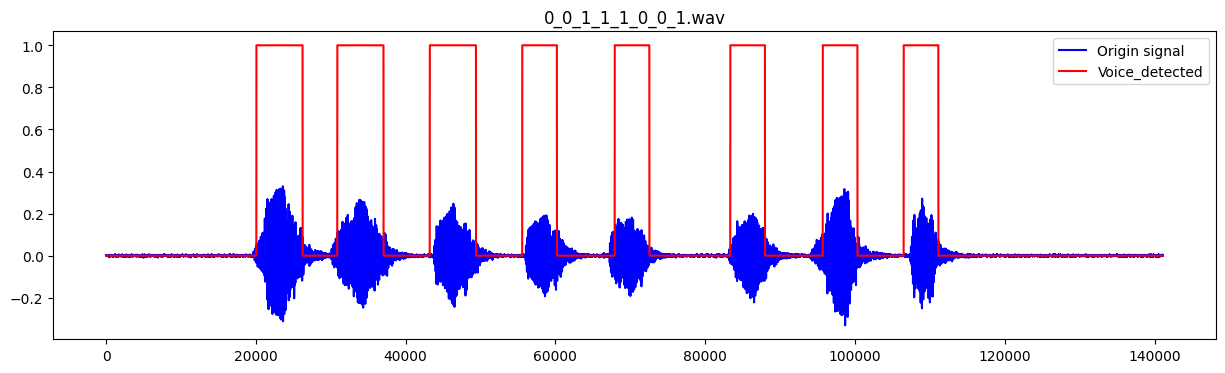

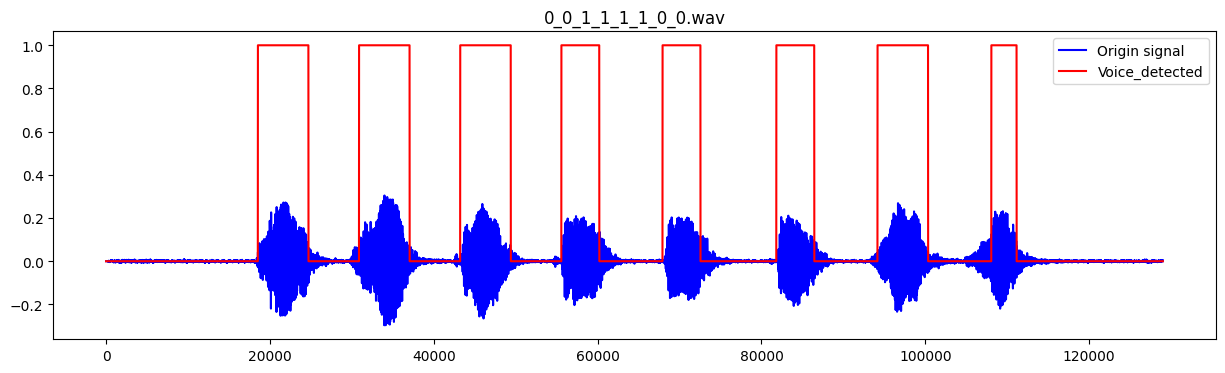

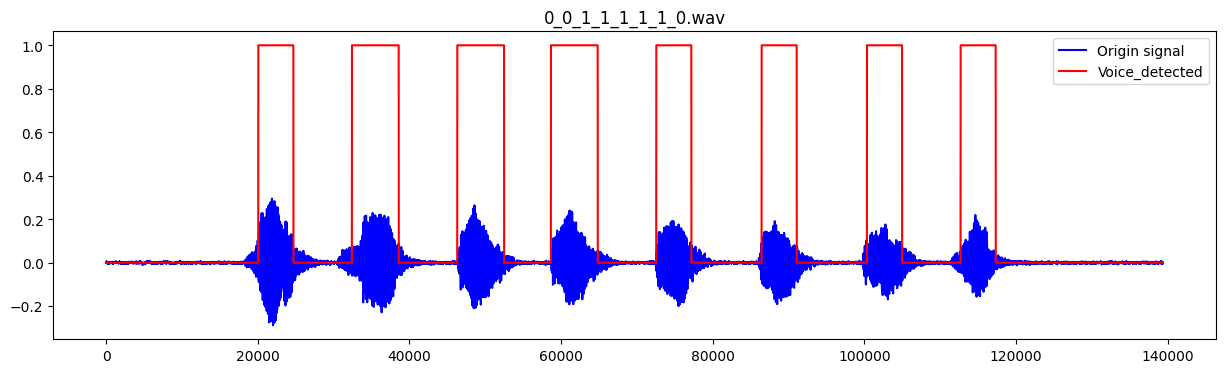

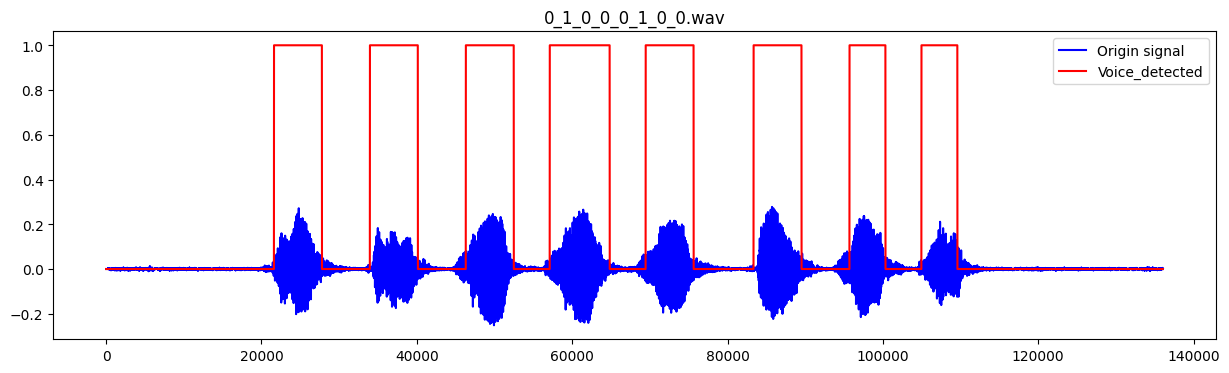

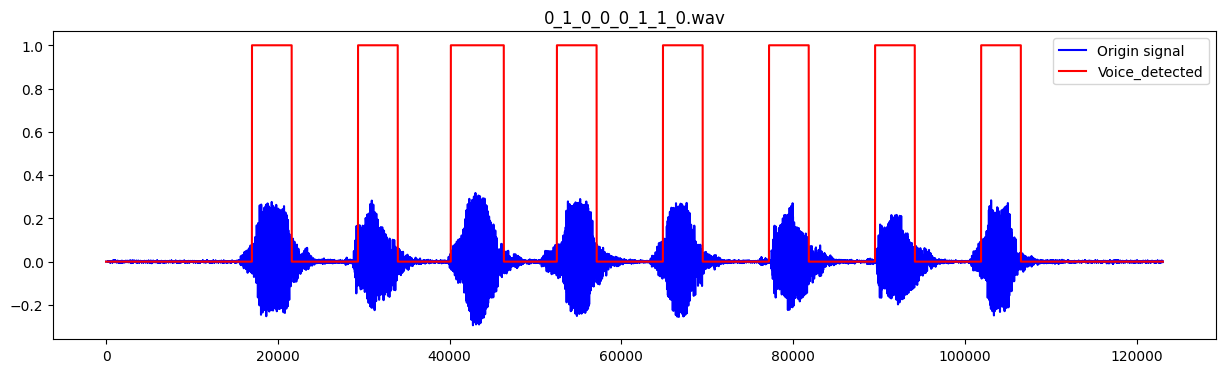

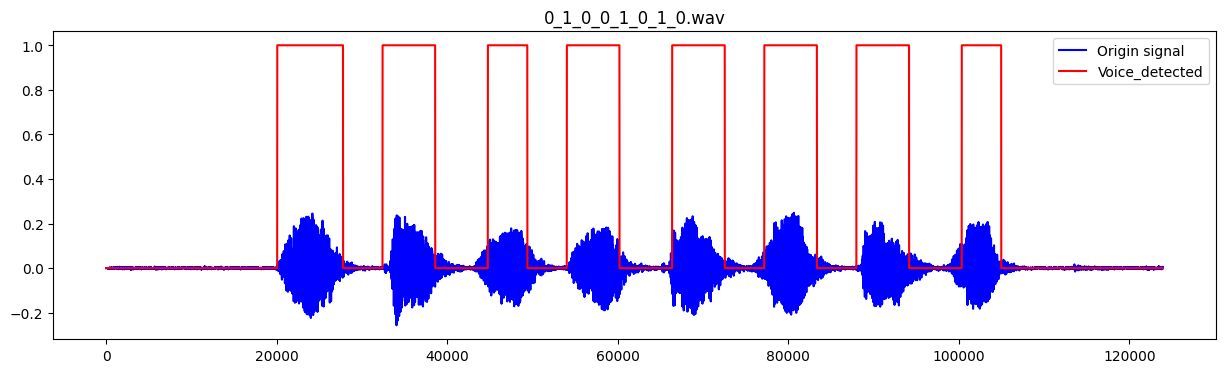

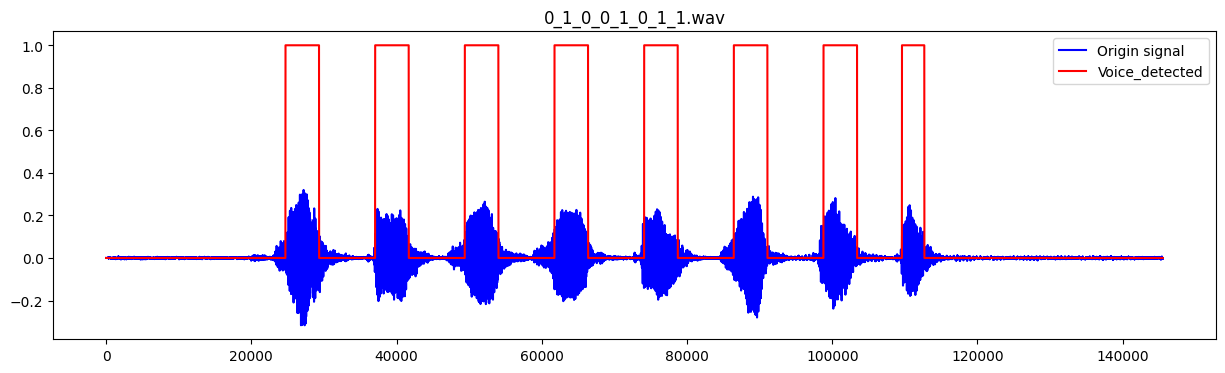

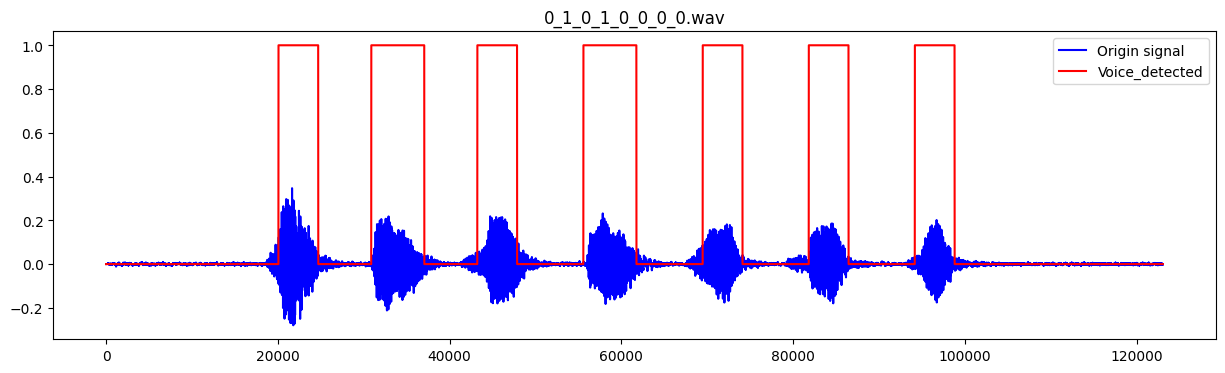

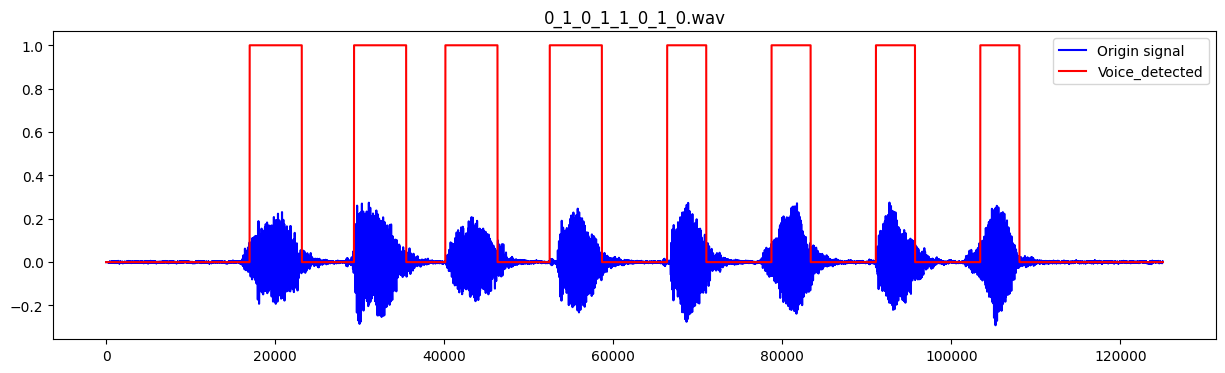

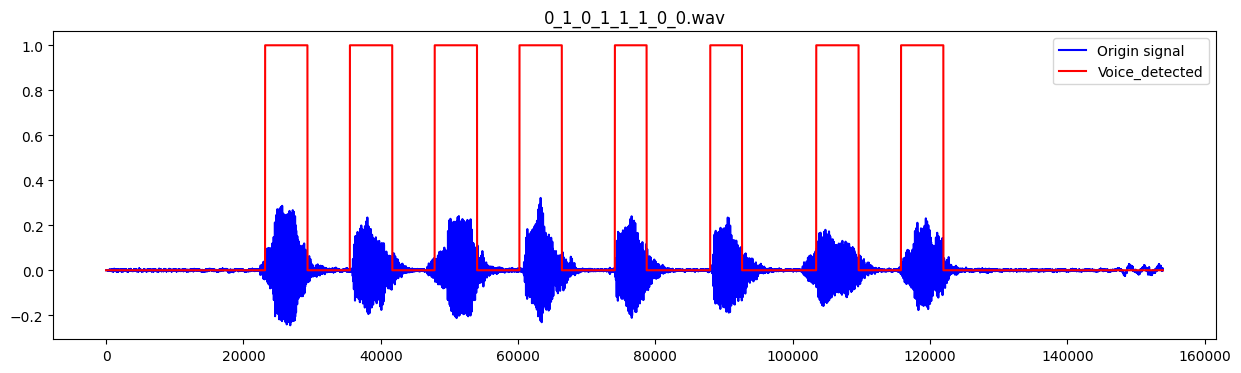

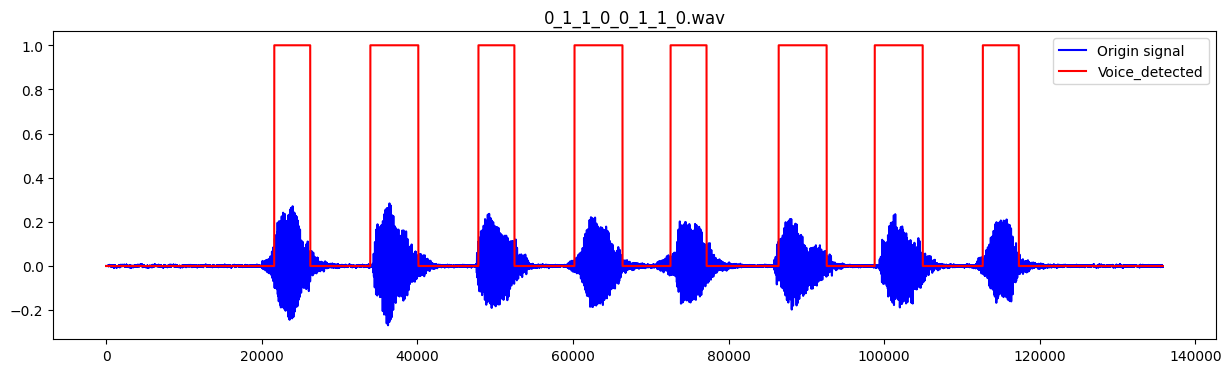

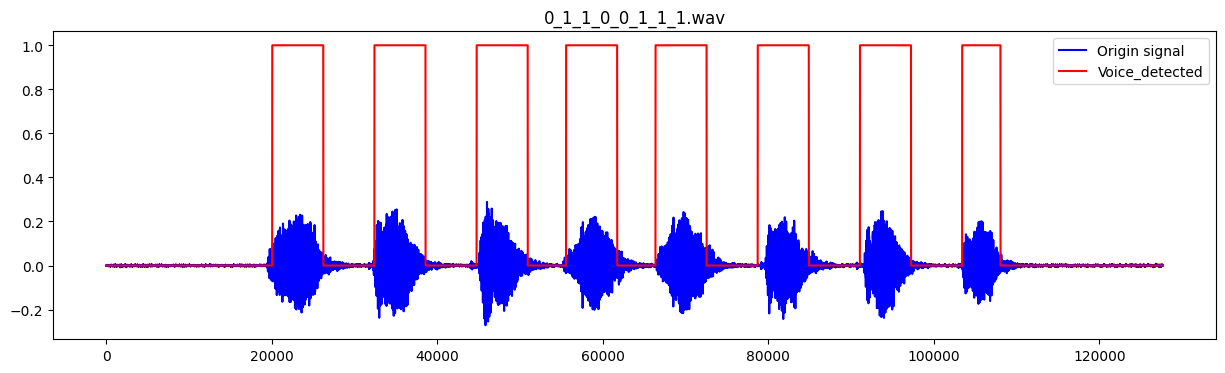

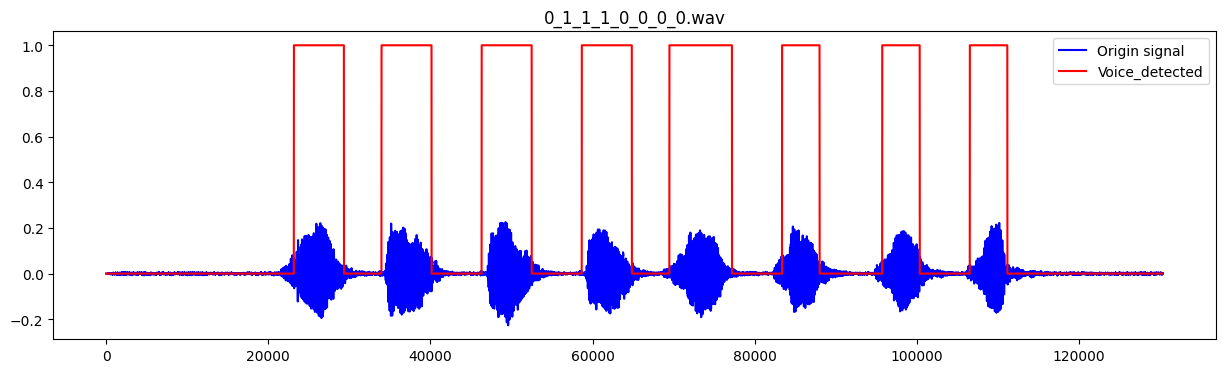

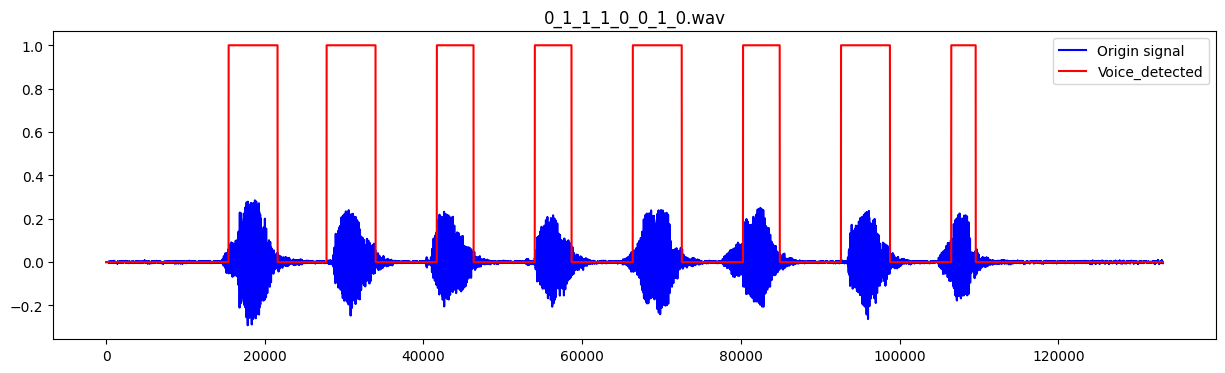

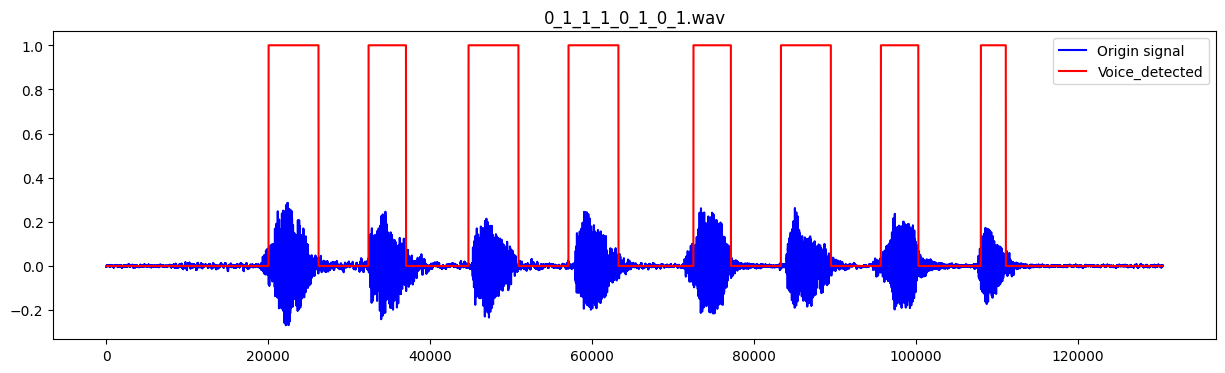

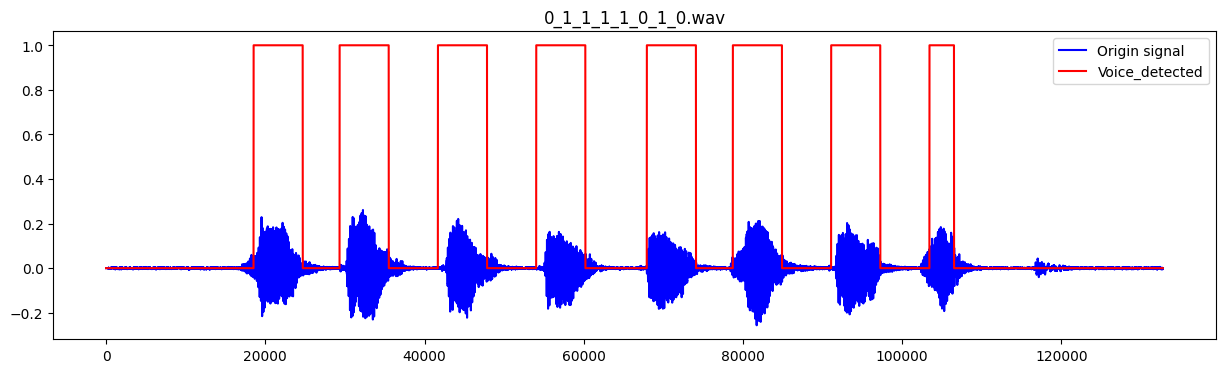

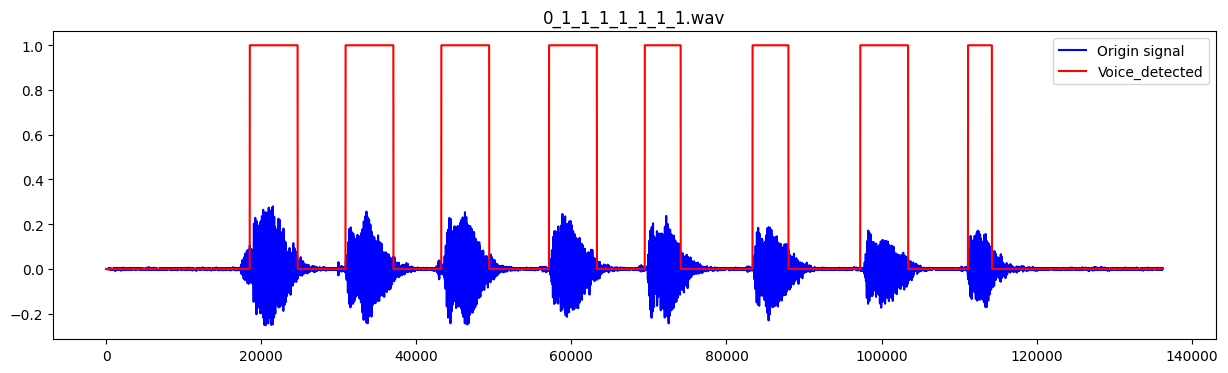

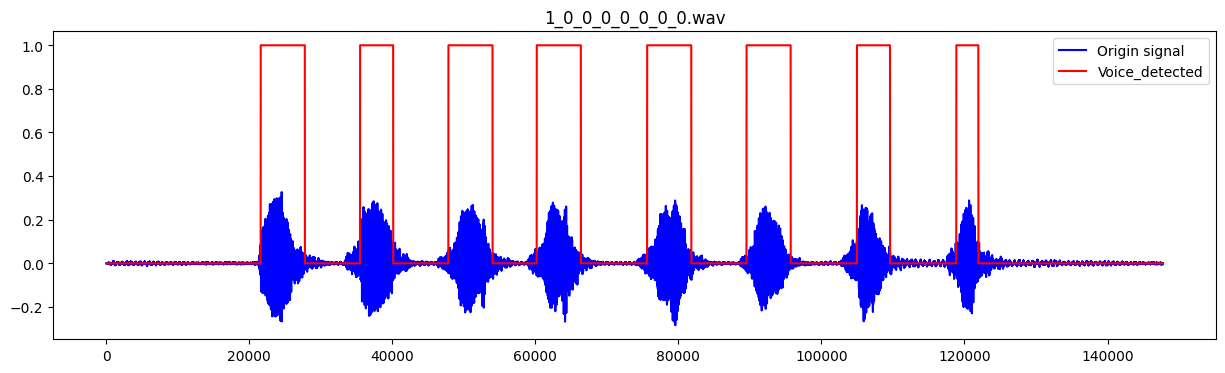

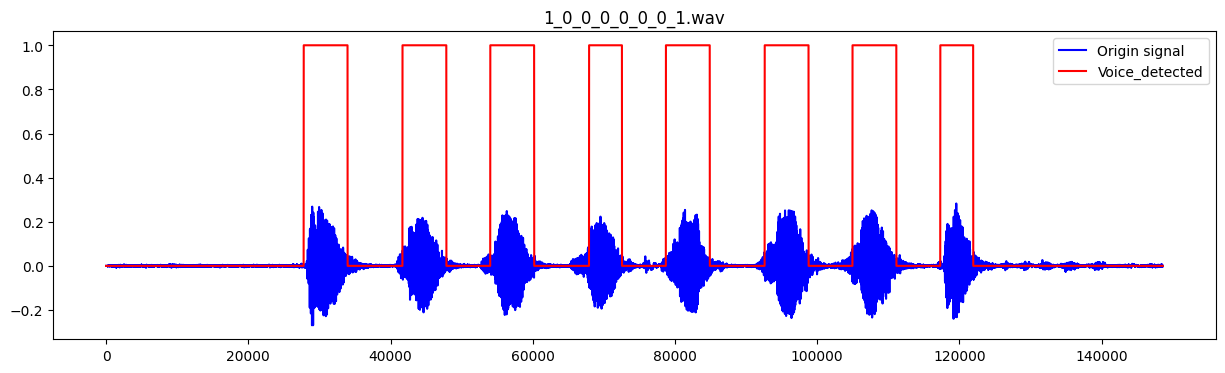

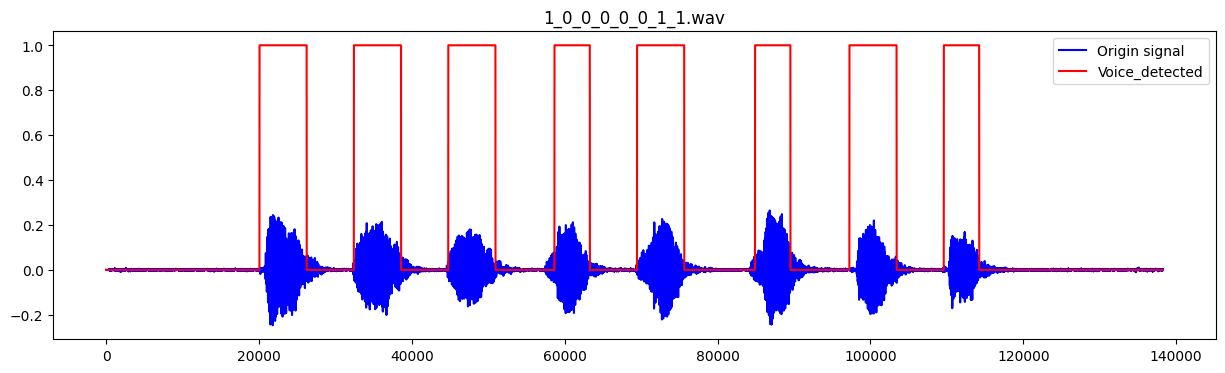

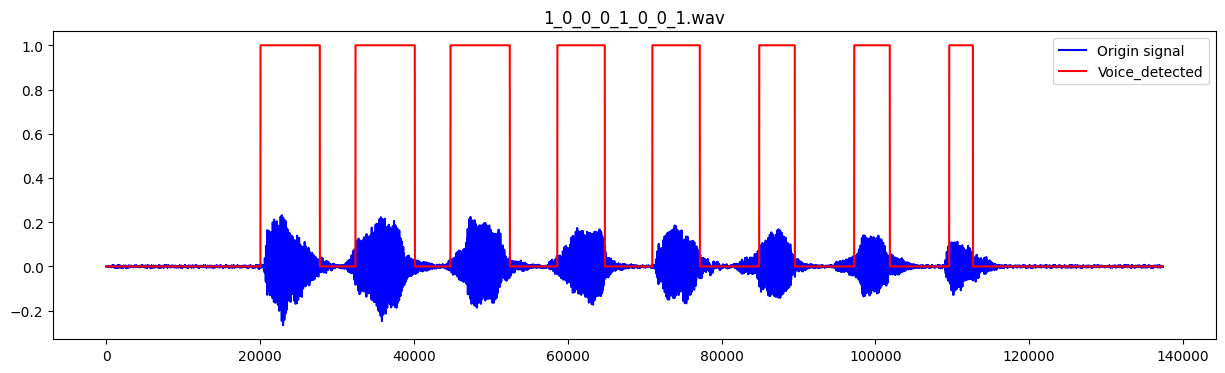

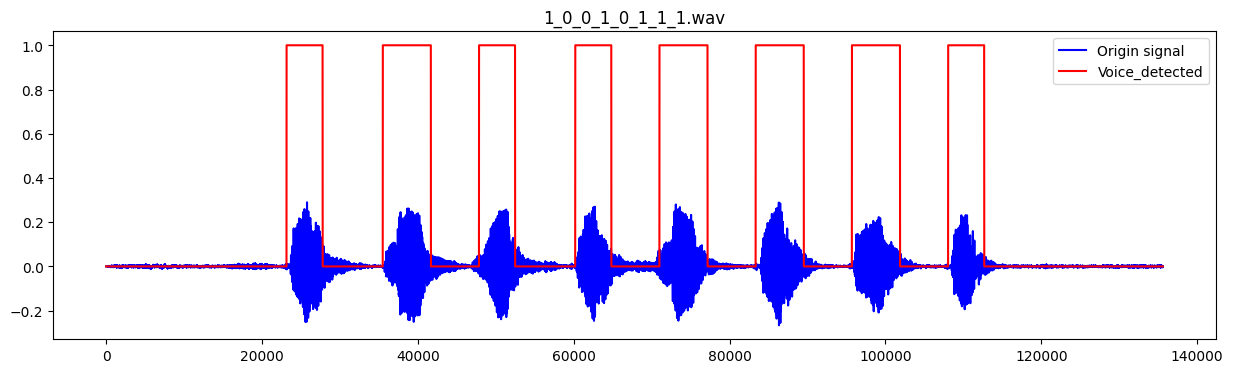

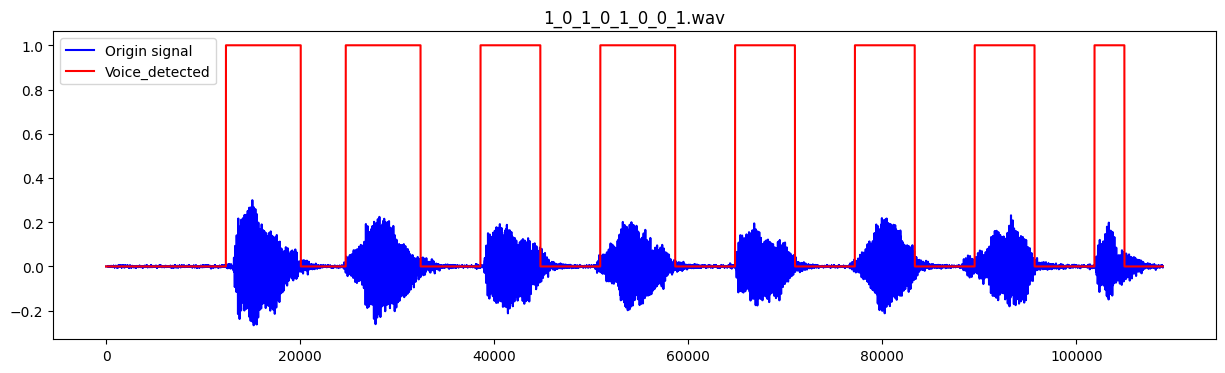

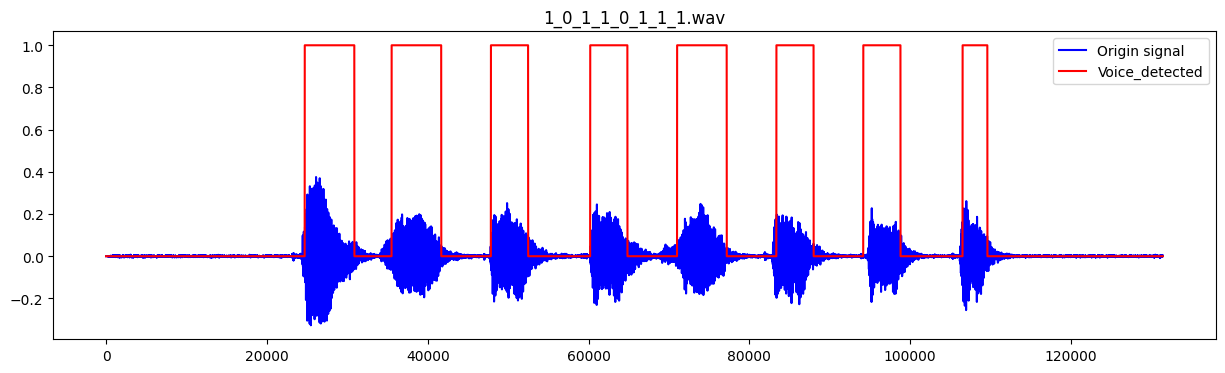

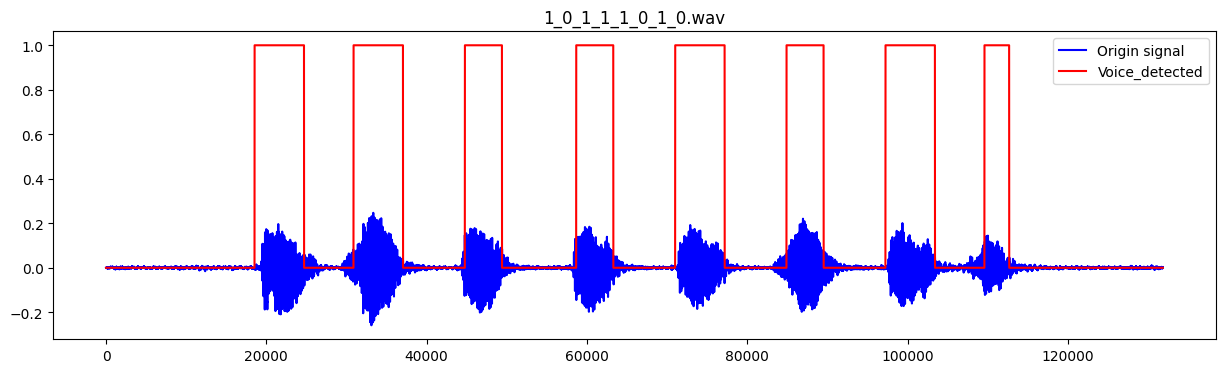

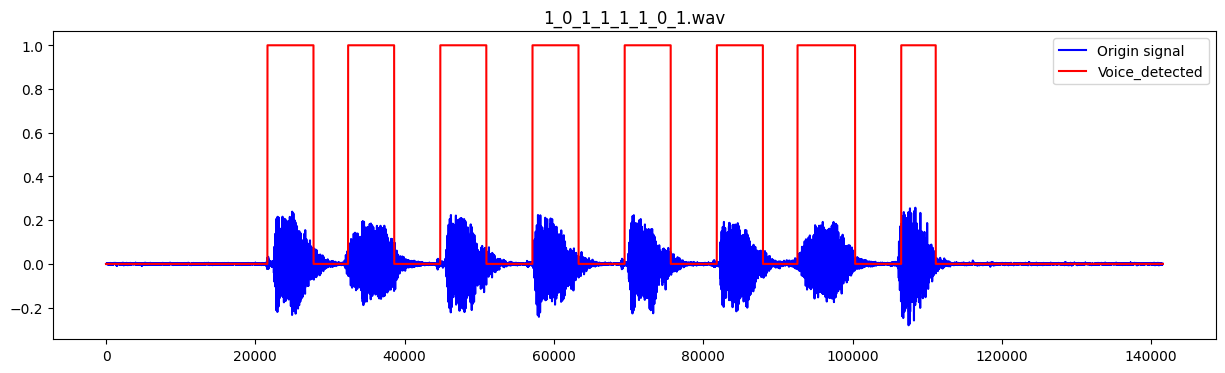

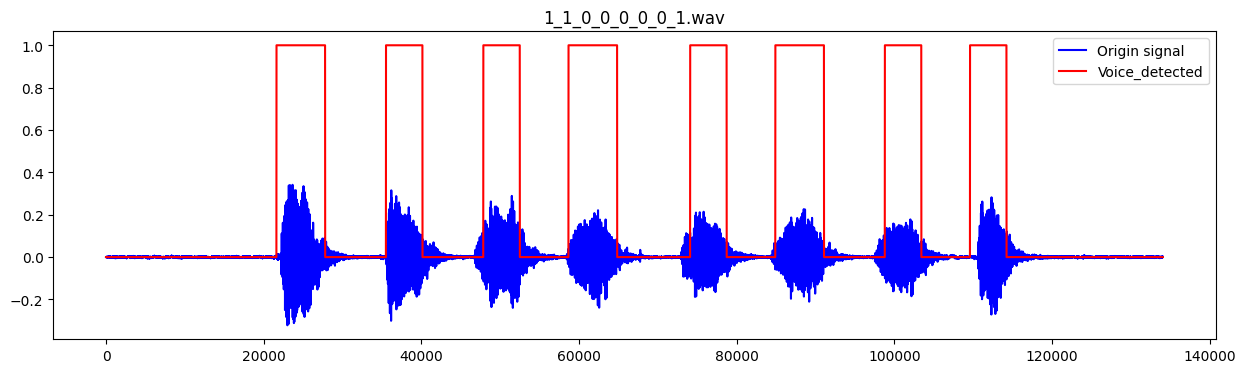

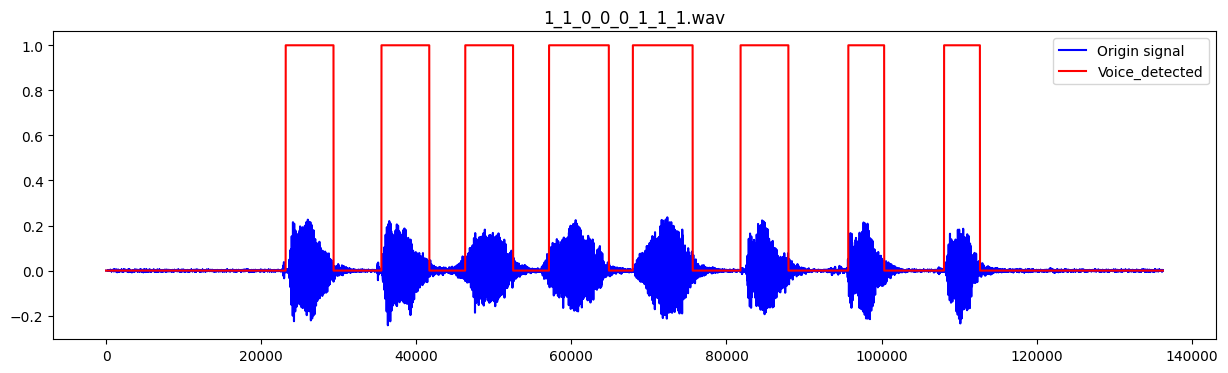

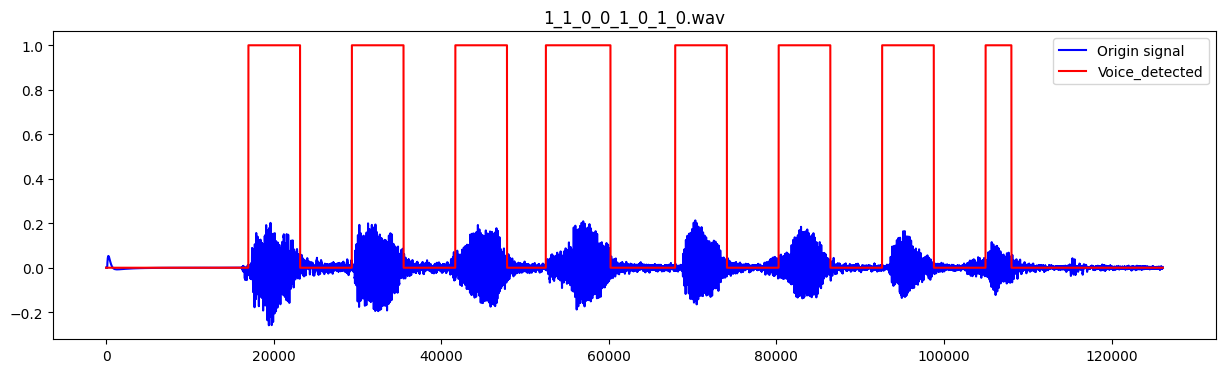

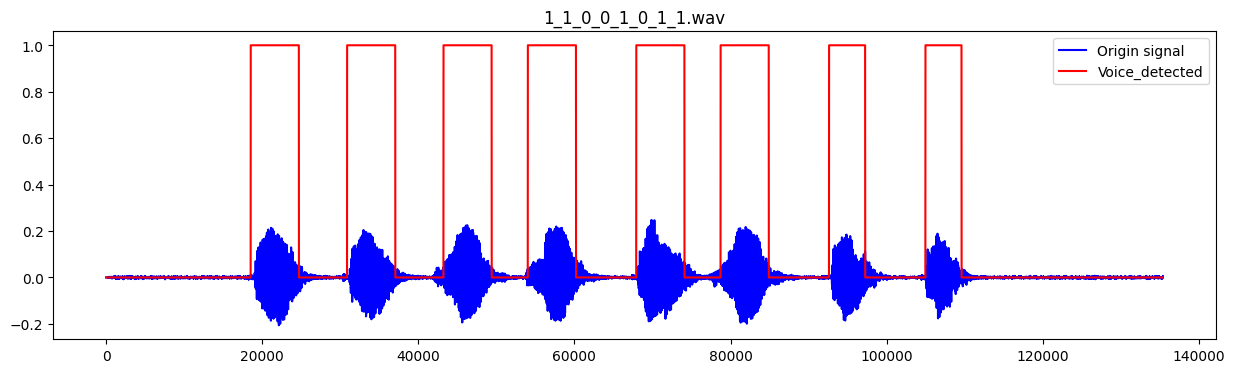

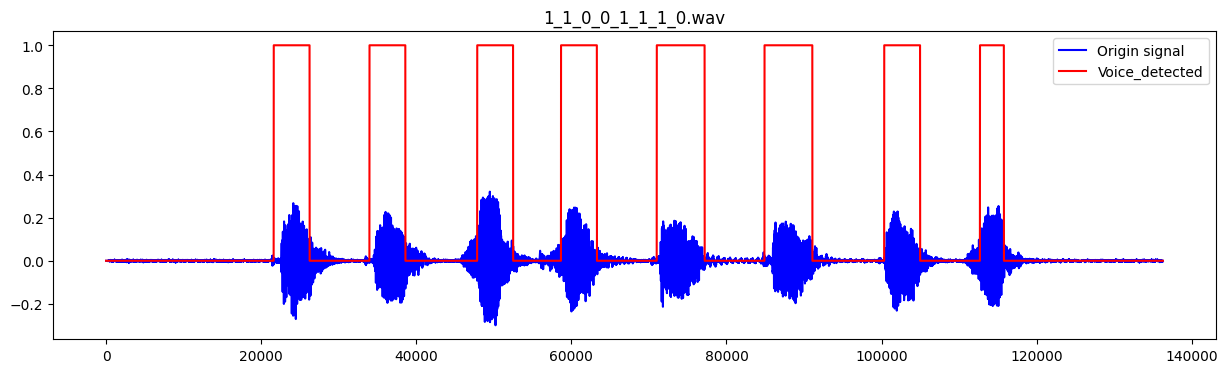

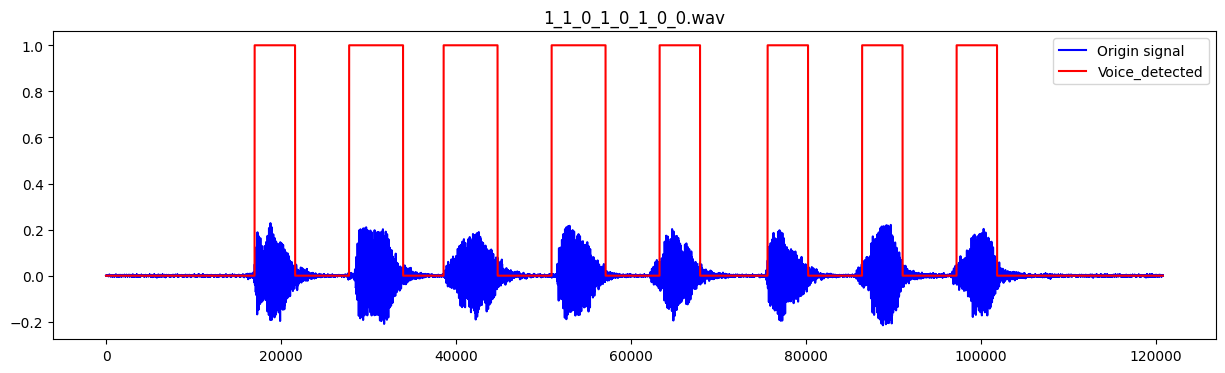

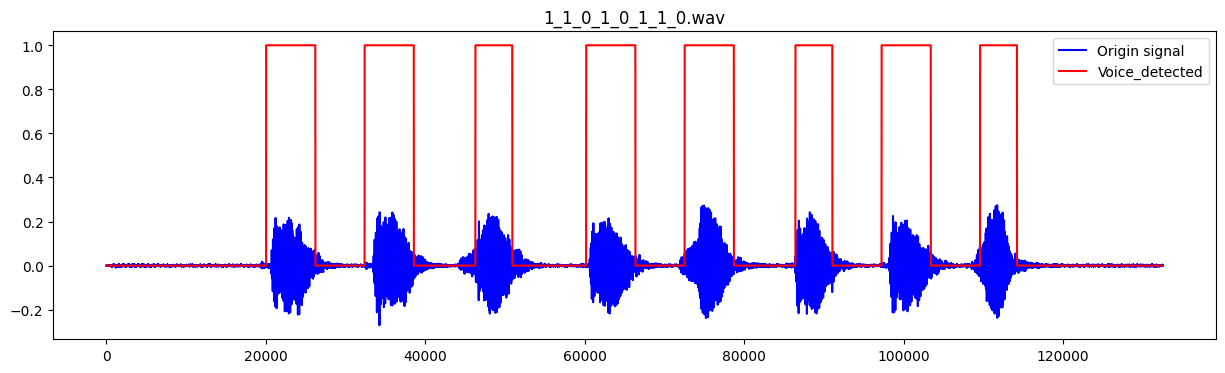

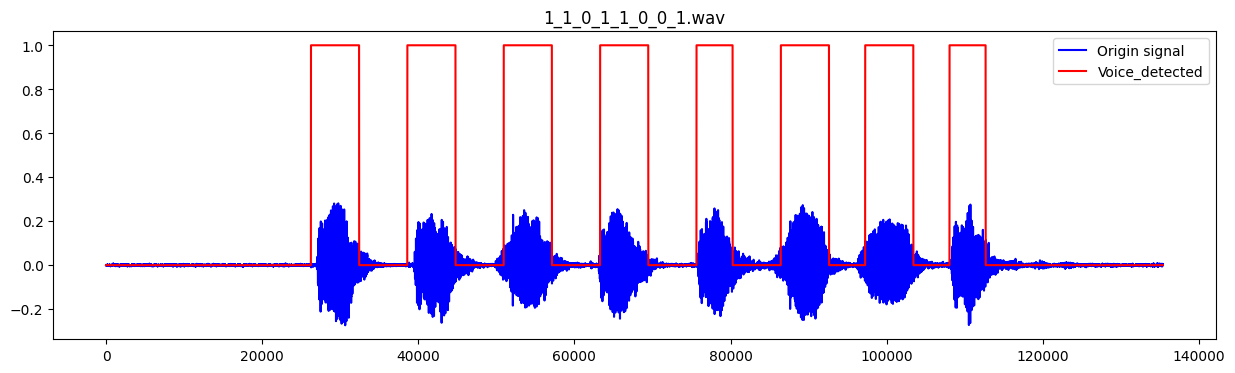

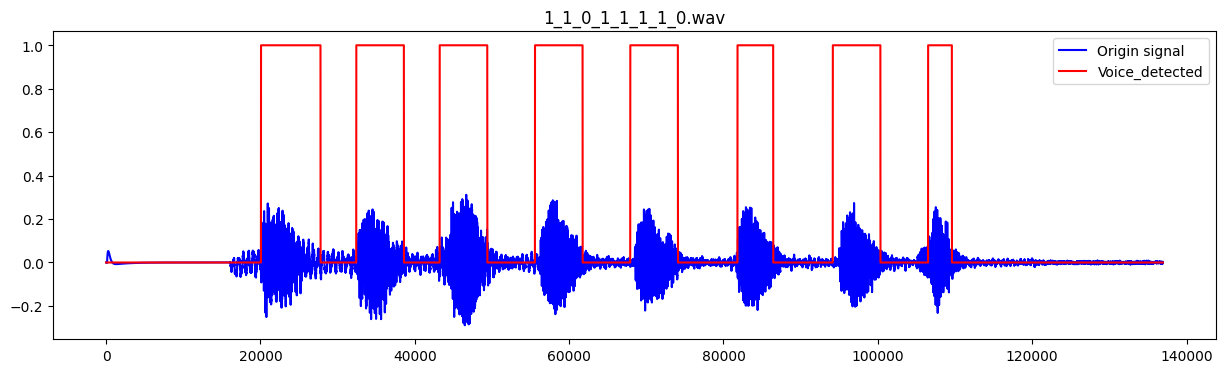

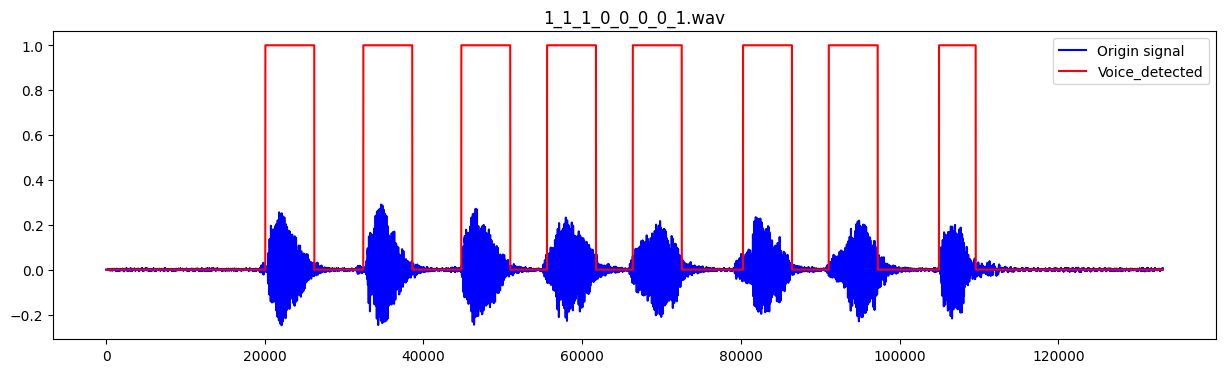

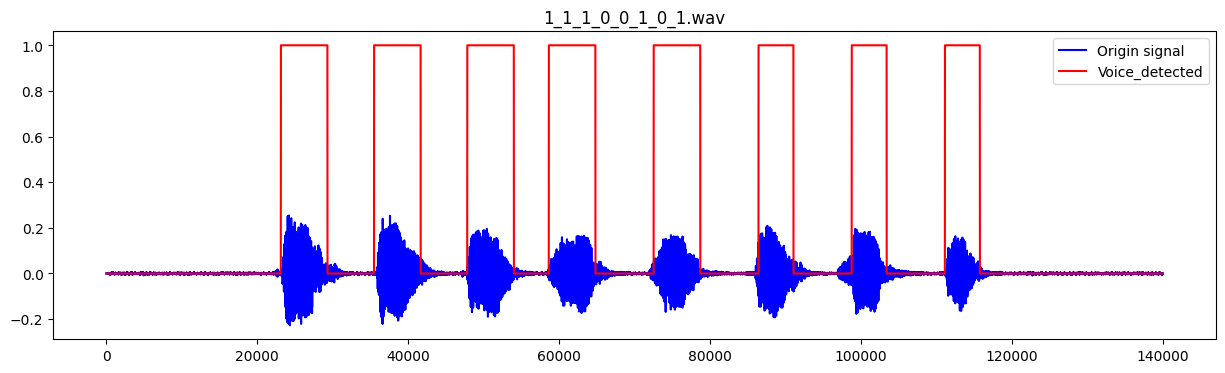

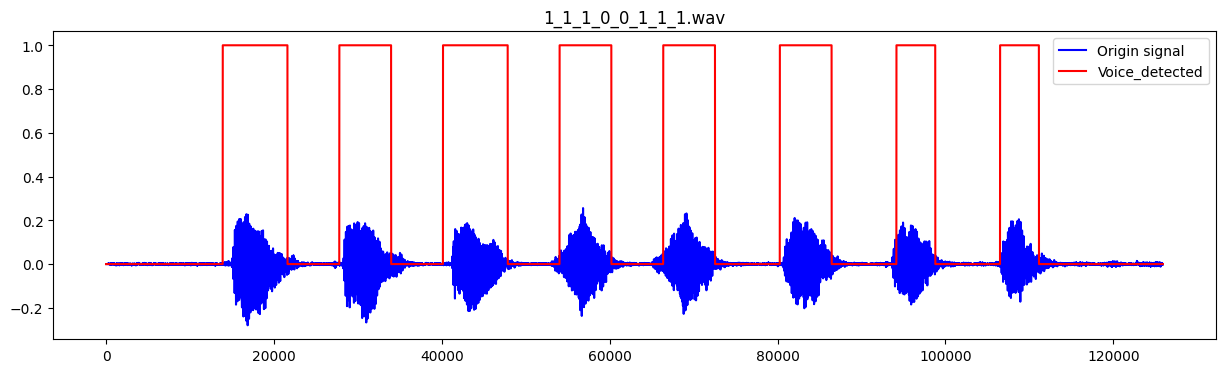

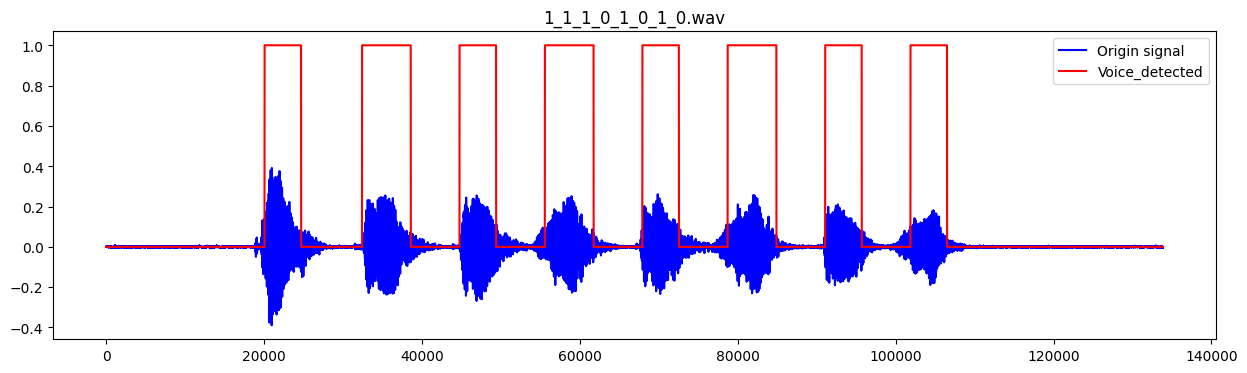

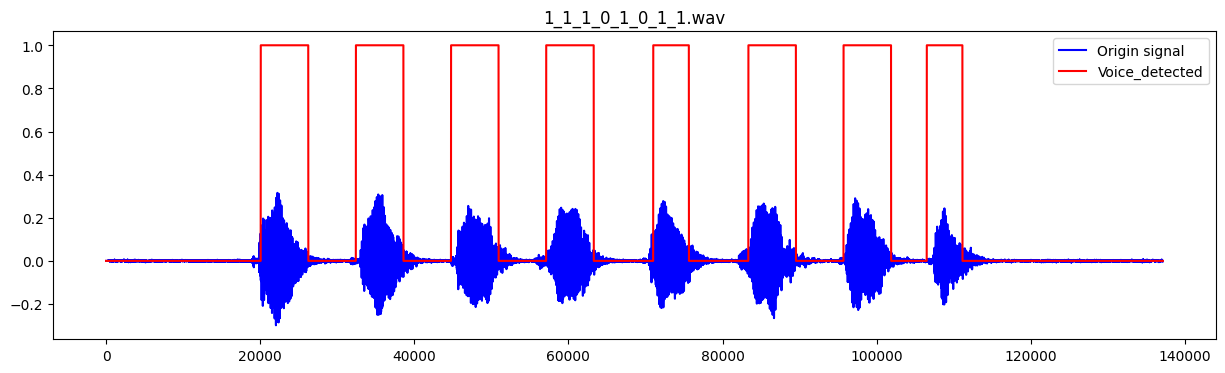

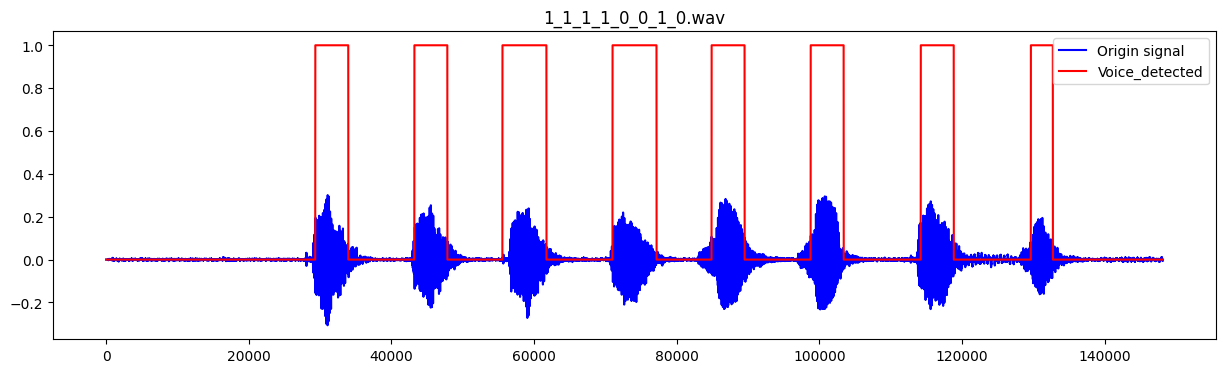

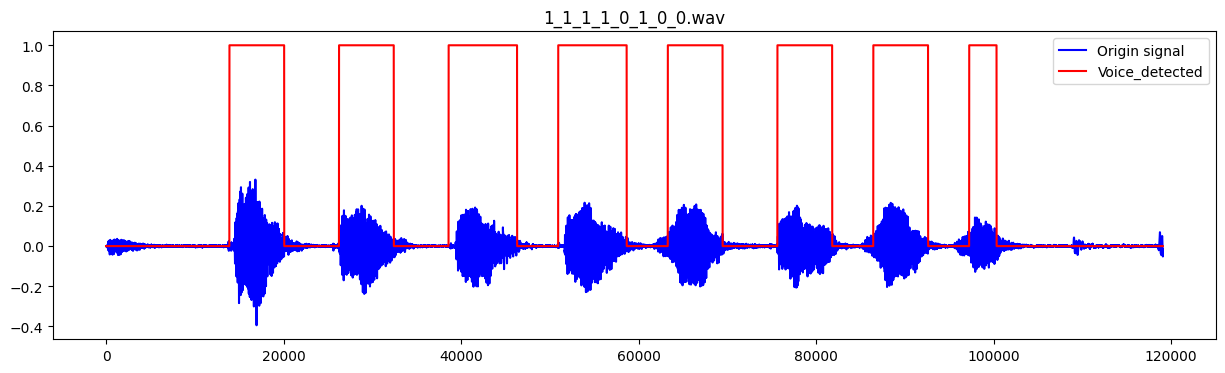

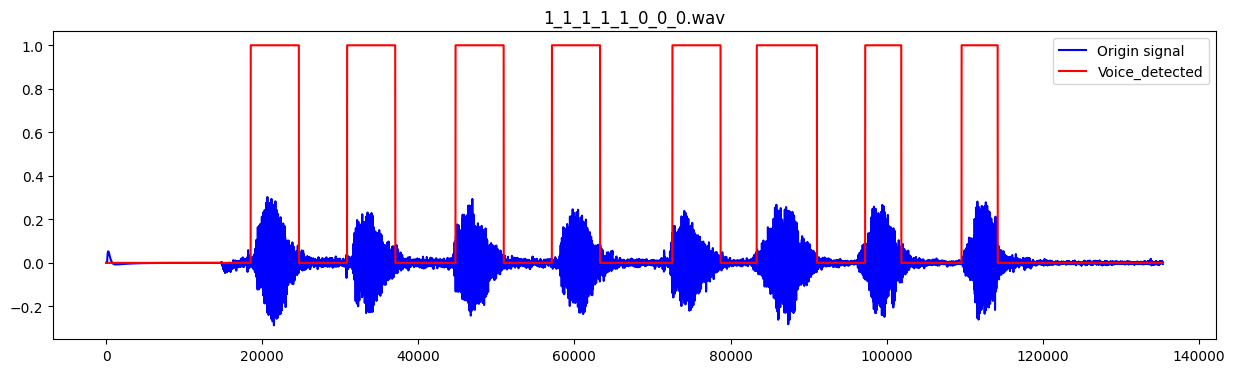

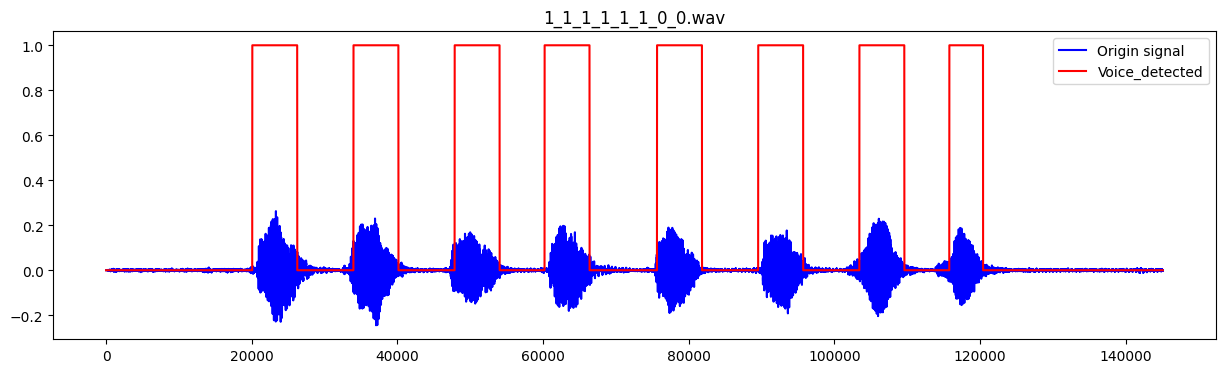

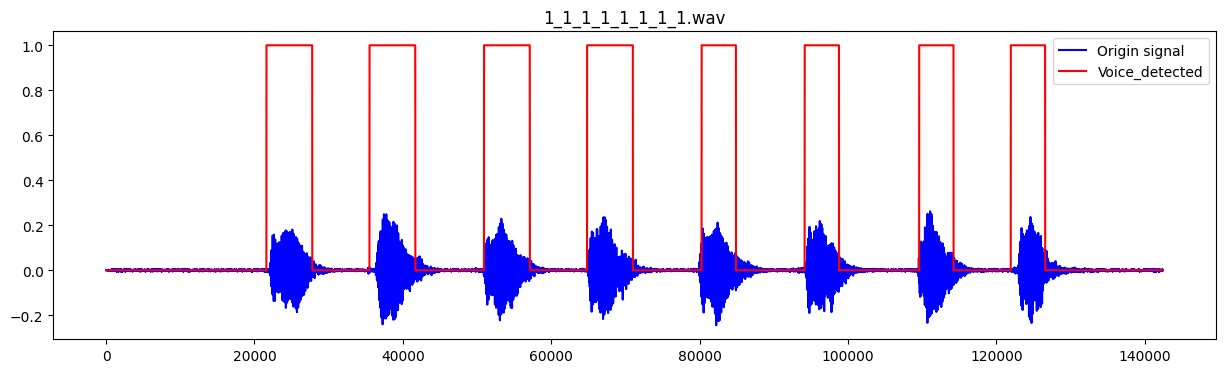

In [11]:
vad_segments = [[] for i in range(len(files))] # создаем список из списков в количестве аудиофайлов


for i in range (len(files)):
    audio_path = '../datasets/waves_yesno 2/' + files[i]

    frame_duration = 0.07  # продолжительность каждого фрейма в секундах
    energy_threshold = 0.06  # порог энергии (активность речи)

    audio, sample_rate = librosa.load(audio_path)

    frame_size = int(frame_duration * sample_rate)  # размер каждого фрейма (в отсчетах)

    num_frames = len(audio) // frame_size  # количество фреймов

    frame_energy = np.zeros(num_frames)  # массив длиной в количество фреймов для внесения активности речи для каждого фрейма
    for j in range(num_frames):
        frame_start = j * frame_size  # старт фрейма
        frame_end = frame_start + frame_size  # конец фрейма
        frame = audio[frame_start:frame_end]  # сэмплы данного фрейма 
        frame_energy[j] = np.sum(np.square(frame))  # находим энергию (активность речи) каждого фрейма

    threshold = energy_threshold * np.max(frame_energy)  # находим порог энергии

    is_speech = frame_energy > threshold  # формируем массив длиной в количество фреймов с индикаторами True abd False

    # находим фрагмаенты речи в аудио
    speech_segments = []
    start_time = 0

    for k in range(1, num_frames):
        if is_speech[k] and not is_speech[k-1]:  # если текущий фрейм речевой, а предыдущий - нет 
            start_point = int(k * frame_duration * sample_rate)  # устанавливаем начальную точку (в отсчетах)
        elif not is_speech[k] and is_speech[k-1]:  # если текущий не речевой, а предыдущий - да
            end_point = int(k * frame_duration * sample_rate) # устанавилаем конечную точку (в отсчетах)

            speech_segments.append([start_point, end_point])  # список из списков, содержащих точку начала речи и конец
    
    vad_segments[i] = speech_segments  # добавляем в список список сегментов для каждого аудио   
    
    plt.figure(figsize=(15, 4))
    plt.plot(audio, label='Origin signal', color='blue')
    plt.title(files[i])

    speech_line = np.zeros(len(audio))

    for segment in speech_segments:
        speech_line[segment[0]:segment[1]] = 1  # для индикации речи

    plt.plot(speech_line, color='red', label='Voice_detected')

    plt.legend()
    plt.show()
    
    

## Task 5

После того как мы узнали сегменты аудио с речью, то можно перейти к самой задаче классификации. \
Внимательно изучи функцию [make_dataset](code-samples/audio_utils.py). С помощью этой функции cгенерируй X, Y для train и test выборок.
Затем попробуй обучить различные классификаторы. Например, SVM или LogisticRegression.
Измерь точность (accuracy) классификации на тестовой выборке.

In [12]:
def make_dataset(samples, labels, vad_segments):
    """

    :param samples: Список аудио сигналов
    :param labels: Список меток (Например для файла '0_0_0_1_0_1_1_0.wav': [0, 0, 0, 1, 0, 1, 1, 0])
    :param vad_segments: Список сегментов для каждого аудио сигнала вида:
        [
            [[23996, 32539], [35410, 44925], ...,],
            [[22141, 30259], [34917, 42695], ...,],
            ...
        ]
    :return:
    """
    X, y = [], []
    # Проходим по каждому аудио сигналу
    for sample in range(len(samples)):  # итерации по каждому аудио
        # В аудио сигнале проходим по каждому сегменту с речью
        for segment in range(len(vad_segments[sample]) - 1):  # итерации по каждому сегменту с речью в аудио
            start = vad_segments[sample][segment][0]  # Начало сегмента
            stop = vad_segments[sample][segment][1]  # Конец сегмента
            voice = samples[sample][start:stop]  # Отрезаем сегмент с речью из аудио сигнала и применяем stft
# оконное преобразование фурье (в спектограмму)
# mean(axis=1) вычисляет среднее значение по столбцам спектограммы, 
# для получения усредненного представления амплитуды звука для каждого временного шага
            stft = librosa.stft(voice).mean(axis=1)  
            stft_db = librosa.amplitude_to_db(abs(stft)) # преобразуем в децибелы

            X.append(stft_db)  # Добавляем спектрограмму с речью
            y.append(labels[sample][segment])  # Добавляем метку для этой спектрограммы

    return np.array(X), np.array(y)

In [13]:
X, y = make_dataset(X, labels, vad_segments)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [15]:
# CVM модель

from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy на тестовой выборке CVM модели: {accuracy}')

Accuracy на тестовой выборке CVM модели: 1.0


In [16]:
# модель логистической регресии

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy на тестовой выборке модели логистической регресии: {accuracy}')

Accuracy на тестовой выборке модели логистической регресии: 1.0


In [17]:
# модель дерева решений

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train) 
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy на тестовой выборке модели дерева решений: {accuracy}')

Accuracy на тестовой выборке модели дерева решений: 0.9156626506024096
